# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.2
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

df = pd.read_parquet(r"C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\Requirement\Datasets and Dictionary\trip_records\2023-1.parquet")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [6]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        file_df = pd.read_parquet(file_path)

        # Filter the data for 2023
        file_df =file_df[(file_df['tpep_pickup_datetime'].dt.year == 2023)]

        print(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_date_df = pd.DataFrame()

        # Capture min and max date from the file 
        start_dt = file_df['tpep_pickup_datetime'].dt.date.min()
        end_dt = file_df['tpep_pickup_datetime'].dt.date.max()

        # Add pickup date and hour to dataframe
        file_df['pickup_date']=file_df['tpep_pickup_datetime'].dt.date
        file_df['pickup_hour']=file_df['tpep_pickup_datetime'].dt.hour

        # Loop through dates and then loop through every hour of each date
        for single_date in pd.date_range(start_dt, end_dt, freq='D'):

            # Create data frame for every day
            day_df = file_df[file_df['pickup_date'] == single_date.date()]

            # Iterate through each hour of the selected date
            for hour in range(24):

                # Create data from for every hour 
                hour_df = day_df[day_df['pickup_hour'] == hour]

                # Sample 0.75% of the hourly data randomly
                sampled_hour_df = hour_df.sample(frac = 0.0075, random_state = 42)

                # add data of this hour to the dataframe
                sampled_date_df = pd.concat([sampled_date_df, sampled_hour_df])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_date_df])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\trip_records\2023-1.parquet
C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\trip_records\2023-10.parquet
C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\trip_records\2023-11.parquet
C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\trip_records\2023-12.parquet
C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\trip_records\2023-2.parquet
C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\trip_records\2023-3.parquet
C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\trip_records\2023-4.parquet
C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\trip_records\2023-5.parquet
C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\trip_records\2023-6.parque

In [99]:
df.shape

(284492, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [13]:
# Store the df in csv/parquet
df.to_parquet(r'C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\sample_file\2023_sample.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [687]:
# Load the new data file
df = pd.read_parquet(r"C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\sample_file\2023_sample.parquet")


In [688]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
428               256             2        32.40    6.0      0.5        0.00   
1113              237             1         7.90    1.0      0.5        2.58   
819               141             2        11.40    1.0      0.5        0.00   
3192              142             2         6.50    1.0      0.5        0.00   
2995263           107             0        25.64    0.0      0.5        5.93   

         tolls_amount  improvement_surcharge  total_amount  \
428               0.0                    1.0         41.15   
1113              0.0                    1.0         15.48   
819               0.0                    1.0         16.40   
3192              0.0                    1.0         11.50   
2995263           0.0                    1.0         35.57   

         congestion_surcharge  airport_fee pickup_date  pickup_hour  \
428                       0.0         1.25  2023-01-01            0   
1113                      2.5         0.00  2023-01-01            0   
819                       2.5         0.00  2023-01-01            0   
3192                      2.5         0.00  2023-01-01            0   
2995263                   NaN          NaN  2023-01-01            0   

         Airport_fee  
428              NaN  
1113             NaN  
819              NaN  
3192             NaN  
2995263          NaN

In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284492 entries, 428 to 2702874
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284492 non-null  int64         
 1   tpep_pickup_datetime   284492 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284492 non-null  datetime64[us]
 3   passenger_count        275065 non-null  float64       
 4   trip_distance          284492 non-null  float64       
 5   RatecodeID             275065 non-null  float64       
 6   store_and_fwd_flag     275065 non-null  object        
 7   PULocationID           284492 non-null  int64         
 8   DOLocationID           284492 non-null  int64         
 9   payment_type           284492 non-null  int64         
 10  fare_amount            284492 non-null  float64       
 11  extra                  284492 non-null  float64       
 12  mta_tax                284492 non-null  float6

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [690]:
# Fix the index and drop any columns that are not needed

df = df.reset_index(drop = True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [691]:
# Combine the two airport fee columns

df['airport_fee'] = df.apply(lambda row:1.25 if pd.isna(row['airport_fee']) and row['Airport_fee'] ==1.25 else row['airport_fee'], axis = 1)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [692]:
# check where values of fare amount are negative

negative_fare_amount = (df['fare_amount']<0).any()
print(negative_fare_amount)

False


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

# There is no value with negative fare amount

In [693]:
# Find which columns have negative values
number_col = df.select_dtypes(include =['number']).columns
negative_col = df[number_col].columns[(df[number_col]<0).any()]
print(negative_col)


Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')


In [694]:
# fix these negative values
df['extra']=df['extra'].apply(lambda x: 0 if x< 0 else x)
df['mta_tax']=df['mta_tax'].apply(lambda x: 0 if x< 0 else x)
df['improvement_surcharge']=df['improvement_surcharge'].apply(lambda x: 0 if x< 0 else x)
df['total_amount']=df['total_amount'].apply(lambda x: 0 if x< 0 else x)
df['congestion_surcharge']=df['congestion_surcharge'].apply(lambda x: 0 if x< 0 else x)
df['airport_fee']=df['airport_fee'].apply(lambda x: 0 if x< 0 else x)
df['Airport_fee']=df['Airport_fee'].apply(lambda x: 0 if x< 0 else x)


In [696]:
# Verify if negative values are removed
number_col = df.select_dtypes(include =['number']).columns
negative_col = df[number_col].columns[(df[number_col]<0).any()]
print(negative_col)


Index([], dtype='object')


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [697]:
# Find the proportion of missing values in each column

100*df.isnull().mean()

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.313626
trip_distance             0.000000
RatecodeID                3.313626
store_and_fwd_flag        3.313626
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.313626
airport_fee              90.715732
pickup_date               0.000000
pickup_hour               0.000000
Airport_fee              11.147941
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [698]:
# Display the rows with null values

null_passenger_count = df[df['passenger_count'].isna()]
print(null_passenger_count)


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
43             2  2023-01-01 01:46:00   2023-01-01 02:15:00              NaN   
44             2  2023-01-01 01:10:00   2023-01-01 01:41:00              NaN   
59             2  2023-01-01 01:18:30   2023-01-01 01:46:19              NaN   
...          ...                  ...                   ...              ...   
284343         1  2023-09-30 21:50:20   2023-09-30 22:06:38              NaN   
284405         1  2023-09-30 22:53:15   2023-09-30 23:10:04              NaN   
284447         2  2023-09-30 23:27:39   2023-09-30 23:43:22              NaN   
284466         1  2023-09-30 23:12:36   2023-09-30 23:36:35              NaN   
284483         1  2023-09-30 23:31:35   2023-09-30 23:41:26              NaN   

        trip_distance  RatecodeID store

In [699]:
# Impute NaN values in 'passenger_count'

med=df['passenger_count'].median()
df['passenger_count']=df['passenger_count'].fillna(med)

Did you find zeroes in passenger_count? Handle these.

In [701]:
med=df['passenger_count'].median()
df['passenger_count']=df['passenger_count'].replace(0,med)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [702]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].unique()

array([ 1., nan,  2.,  5.,  3., 99.,  4.])

In [703]:
mod=df['RatecodeID'].mode()[0]
df['RatecodeID']=df['RatecodeID'].fillna(mod)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [704]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].unique()



array([0. , 2.5, nan])

In [705]:
mod=df['congestion_surcharge'].mode()[0]
df['congestion_surcharge']=df['congestion_surcharge'].fillna(mod)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [706]:
# Handle any remaining missing values
100*df.isnull().mean()


VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           0.000000
trip_distance             0.000000
RatecodeID                0.000000
store_and_fwd_flag        3.313626
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      0.000000
airport_fee              90.715732
pickup_date               0.000000
pickup_hour               0.000000
Airport_fee              11.147941
dtype: float64

In [707]:
df['airport_fee']=df['airport_fee'].fillna(0)
mod=df['store_and_fwd_flag'].mode()[0]
df['store_and_fwd_flag']=df['store_and_fwd_flag'].fillna(mod)
df=df.drop('Airport_fee',axis=1)

In [708]:
100*df.isnull().mean()

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
pickup_date              0.0
pickup_hour              0.0
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [742]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  284492.000000                      284492                      284492   
mean        1.733349  2023-07-02 19:20:41.997792  2023-07-02 19:38:02.314909   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 15:36:21.500000  2023-04-02 15:53:39.500000   
50%         2.000000         2023-06-27 15:13:50  2023-06-27 15:29:38.500000   
75%         2.000000  2023-10-06 19:15:56.500000         2023-10-06 19:31:38   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447582                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    284492.000000  284492.000000  284492.000000  284492.000000   
mean          1.370766       3.569540       1.634281     165.252106   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.863288      46.959114       7.408107      64.049104   

        DOLocationID   payment_type    fare_amount          extra  \
count  284492.000000  284492.000000  284492.000000  284492.000000   
mean      163.953180       1.165094      19.817924       1.587169   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     910.000000      14.250000   
std        69.773988       0.506215      18.203902       1.823733   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  284492.000000  284492.000000  284492.000000          284492.000000   
mean        0.495351       3.544263       0.592555               0.999038   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.290000     143.000000               1.000000   
std         0.048064       4.051388       2.175295               0.028606   

        total_amount  congestion_surcharge    airport_fee    pickup_hour  
count  284492.000000         284492.000000  284492.000000  284492.000000  
mean       28.873270              2.314758       0.026727      14.264675  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000       0.000000      11.000000  
50%        21.000000              2.500000       0.000000      15.000000  
75%        30.800000              2.500000       0.000000      19.000000  
max       911.000000              2.500000       1.250000      23.000000  
std        22.759879              0.654823       0.180818       5.807753

In [743]:
df['passenger_count'].value_counts()

passenger_count
1.0    221058
2.0     41394
3.0     10386
4.0      5709
5.0      3547
6.0      2393
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [713]:
df['trip_distance'].describe()

count    284492.000000
mean          3.569540
std          46.959114
min           0.000000
25%           1.050000
50%           1.800000
75%           3.400000
max       22528.820000
Name: trip_distance, dtype: float64

In [724]:
df['fare_amount'].describe()

count    284492.000000
mean         19.817924
std          18.203902
min           0.000000
25%           9.300000
50%          13.500000
75%          21.900000
max         910.000000
Name: fare_amount, dtype: float64

In [ ]:
df['tip_amount'].describe()

count    284492.000000
mean          3.544263
std           4.051388
min           0.000000
25%           1.000000
50%           2.840000
75%           4.420000
max         150.290000
Name: tip_amount, dtype: float64

In [726]:
df['mta_tax'].value_counts()

mta_tax
0.50    281832
0.00      2647
0.80         9
0.05         4
Name: count, dtype: int64

In [744]:

df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    282868
Y      1624
Name: count, dtype: int64

In [745]:

df['payment_type'].value_counts()


payment_type
1    224047
2     47681
0      9427
4      2040
3      1297
Name: count, dtype: int64

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [746]:
# remove passenger_count > 6
df = df[(df['passenger_count']<=6)]

In [747]:
# Remove entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
df = df[~((df['trip_distance'] < 0.1 ) & (df['fare_amount'] > 300 ))]

In [748]:
# Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different 
# (both distance and fare should not be zero for different zones)

df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [749]:

# remove entries with trip distance more than 250 miles 
df = df[df['trip_distance'] <= 250]

In [750]:
# Continue with outlier handling
# Drop entries with payment_type = 0
df = df[df['payment_type'] !=0]


In [751]:
# Drop entries with RatecodeID = 99
df = df[df['RatecodeID'] !=99]

In [752]:
# Drop entries with mta_tax not in 0, 0.5
df = df[df['mta_tax'].isin([0, 0.5])]

In [753]:
# Drop entries with airport_fee not in 0, 1.25
df = df[df['airport_fee'].isin([0, 1.25])]

In [754]:
df.shape

(273402, 21)

In [755]:
# Do any columns need standardising?

pd.set_option('display.max_columns',None)
df.head(5)

# No standardization is required

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
5           7.10         1.0                  N           246            37   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         32.4    6.0      0.5        0.00           0.0   
1             1          7.9    1.0      0.5        2.58           0.0   
2             2         11.4    1.0      0.5        0.00           0.0   
3             2          6.5    1.0      0.5        0.00           0.0   
5             1         34.5    3.5      0.5        7.90           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
5                    1.0         47.40                   2.5         0.00   

  pickup_date  pickup_hour  
0  2023-01-01            0  
1  2023-01-01            0  
2  2023-01-01            0  
3  2023-01-01            0  
5  2023-01-01            0

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [757]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Category
* `tpep_pickup_datetime`: Categorical (Temporal)
* `tpep_dropoff_datetime`:Categorical (Temporal)
* `passenger_count`: Numerical
* `trip_distance`:Numerical
* `RatecodeID`: Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`: Numerical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` : Numerical
* `extra` : Numerical
* `mta_tax`:Numerical
* `tip_amount` :Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge` : Numerical
* `total_amount`:Numerical
* `congestion_surcharge`:Numerical
* `airport_fee`:Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

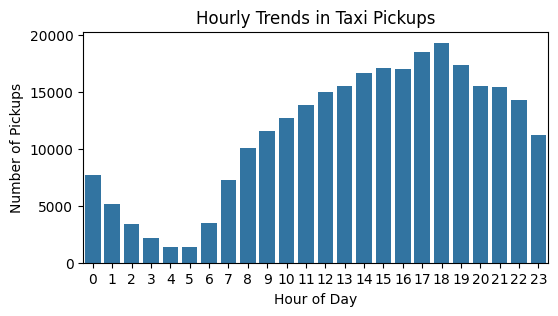

In [759]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
plt.figure(figsize=(6, 3))
sns.countplot(x=df['pickup_hour'])
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()

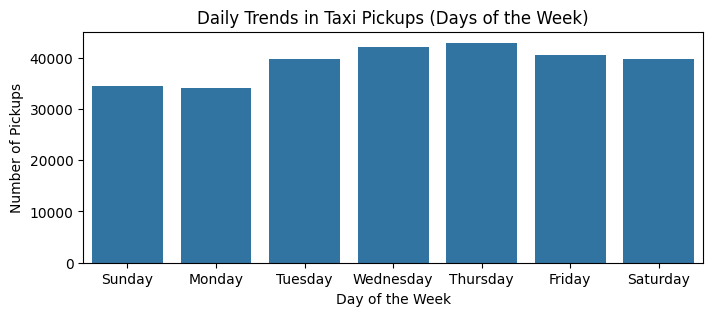

In [762]:
# Find and show the daily trends in taxi pickups (days of the week)

df['day_name'] = df['tpep_pickup_datetime'].dt.day_name()
plt.figure(figsize=(8, 3))
sns.countplot(x=df['day_name'])
plt.title('Daily Trends in Taxi Pickups (Days of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()

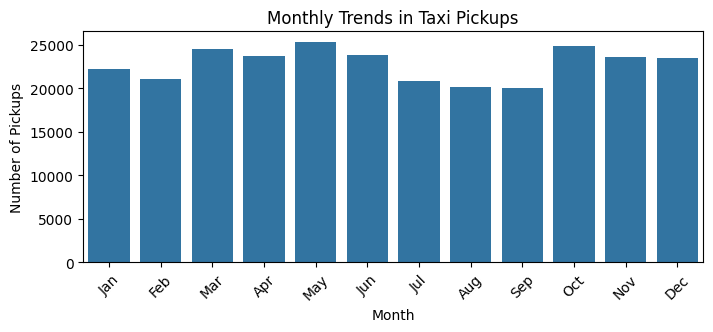

In [764]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
plt.figure(figsize=(8, 3))
sns.countplot(x=df['pickup_month'])
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [766]:
# Analyse the above parameters

# Check for zero or negative values in the specified columns
for column in ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']:
    # Find rows where the value is zero or negative
    negative_values = df[column] < 0
    zero_values = df[column] == 0
    # Count how many such values exist
    count_negative = negative_values.sum()
    count_zero = zero_values.sum()
    
    # Output the result
    print(f"Column: {column}")
    print(f"Count of Negative Values: {count_negative}")
    print(f"Count of Zero Values: {count_zero}")

Column: fare_amount
Count of Negative Values: 0
Count of Zero Values: 86
Column: tip_amount
Count of Negative Values: 0
Count of Zero Values: 59923
Column: total_amount
Count of Negative Values: 0
Count of Zero Values: 40
Column: trip_distance
Count of Negative Values: 0
Count of Zero Values: 3227


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Answer: Yes, it is beneficial to create a copy leaving out the zero values. Again, please note that none of the above values are negative. Tip amount can be zero as it depends on customer's choice. Trip Distance may be zero where pick up and drop zones are same. Only fare amount and totoal amounts are the ones which should not be zero.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

Answer: No, it is not suitable to exclude records where pickup and drop points are in the smae zone as these could be cases of round trip. This also is another important trend to be analyzed.

In [767]:
# Create a df with non zero entries for the selected parameters.

filtered_df = df[(df['fare_amount'] != 0) & (df['total_amount'] != 0) ]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

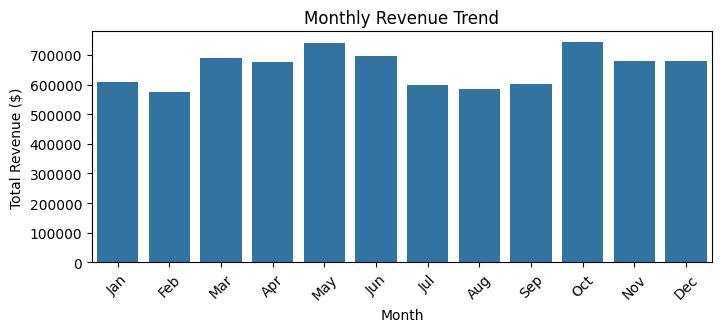

In [769]:
# Group by the month and calculate the sum of total_amount
monthly_revenue = filtered_df.groupby('pickup_month')['total_amount'].sum().reset_index()

plt.figure(figsize=(8, 3))
sns.barplot(x=monthly_revenue['pickup_month'].astype(str), y = monthly_revenue['total_amount'])
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [770]:
# Calculate proportion of each quarter
filtered_df['quarter'] = filtered_df['tpep_pickup_datetime'].dt.quarter

# Group by the quarter and calculate the sum of total_amount
quarterly_revenue = filtered_df.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate total revenue
total_revenue = quarterly_revenue['total_amount'].sum()

#Calculate proportion of each quarter
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue

print (quarterly_revenue)



   quarter  total_amount  proportion
0        1    1872110.19    0.237864
1        2    2110027.31    0.268093
2        3    1786363.98    0.226969
3        4    2102015.19    0.267075


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.9443503287990149


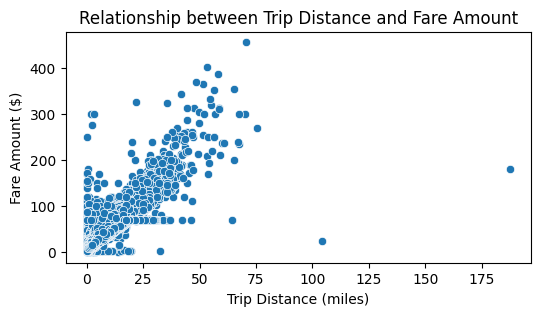

In [771]:
# Show how trip fare is affected by distance

# Filter out rows where trip_distance = 0
trip_filtered_df = filtered_df[filtered_df['trip_distance'] > 0]

# Calculate the correlation between trip_distance and fare_amount
correlation = trip_filtered_df['trip_distance'].corr(trip_filtered_df['fare_amount'])

print(f'Correlation between trip_distance and fare_amount: {correlation}')

# Plot the relationship between trip_distance and fare_amount
plt.figure(figsize=(6, 3))
sns.scatterplot(x=trip_filtered_df['trip_distance'], y=trip_filtered_df['fare_amount'])
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare_amount and trip_duration: 0.2653877062539527


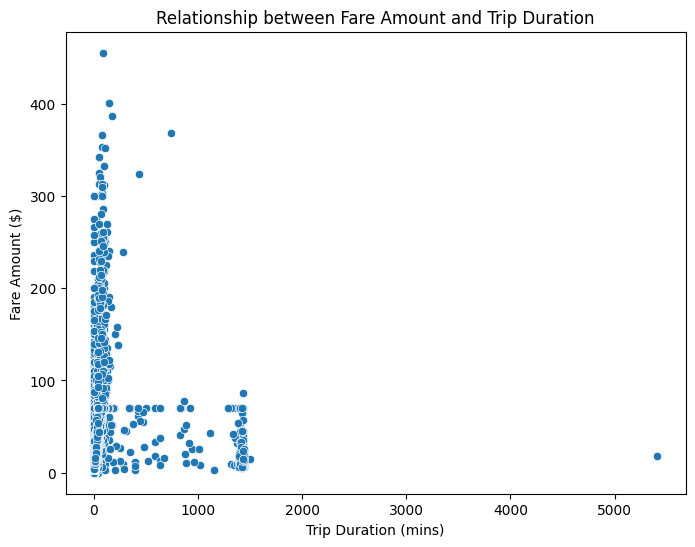

In [773]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds() / 60  


# Filter out rows where trip_duration = 0
trip_filtered_df = filtered_df[filtered_df['trip_duration'] > 0]

# Calculate the correlation between fare_amount and trip_duration
correlation = trip_filtered_df['fare_amount'].corr(trip_filtered_df['trip_duration'])

print(f'Correlation between fare_amount and trip_duration: {correlation}')


# Plot the relationship between fare_amount and trip_duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x=trip_filtered_df['trip_duration'], y=trip_filtered_df['fare_amount'])
plt.title('Relationship between Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (mins)')
plt.ylabel('Fare Amount ($)')
plt.show()


Correlation between fare amount and number of passengers: 0.046503479061579554


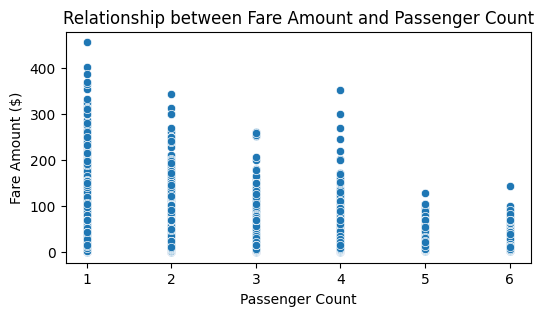

In [774]:
# Show relationship between fare and number of passengers

# Filter out rows where fare amount and number of passengers = 0
filtered_df = filtered_df[(filtered_df['fare_amount'] > 0) & (filtered_df['passenger_count']>0)]

# Calculate the correlation between fare amount and number of passengers
correlation = filtered_df['fare_amount'].corr(filtered_df['passenger_count'])

print(f'Correlation between fare amount and number of passengers: {correlation}')

# Plot the relationship between fare amount and number of passengers
plt.figure(figsize=(6, 3))
sns.scatterplot(x=filtered_df['passenger_count'], y=filtered_df['fare_amount'])
plt.title('Relationship between Fare Amount and Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()


Correlation between tip amount and trip distance: 0.7940017983372339


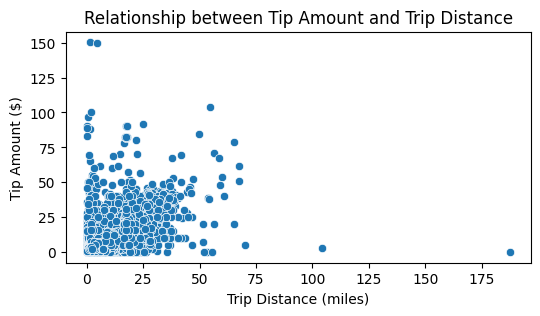

In [776]:
# Show relationship between tip and trip distance

# Filter out rows where tip amount and trip distance = 0
trip_filtered_df = filtered_df[(filtered_df['tip_amount'] > 0) & (filtered_df['trip_distance']>0)]

# Calculate the correlation between tip amount and trip distance
correlation = trip_filtered_df['tip_amount'].corr(trip_filtered_df['trip_distance'])

print(f'Correlation between tip amount and trip distance: {correlation}')

# Plot the relationship between tip amount and trip distance
plt.figure(figsize=(6, 3))
sns.scatterplot(x=trip_filtered_df['trip_distance'], y=trip_filtered_df['tip_amount'])
plt.title('Relationship between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



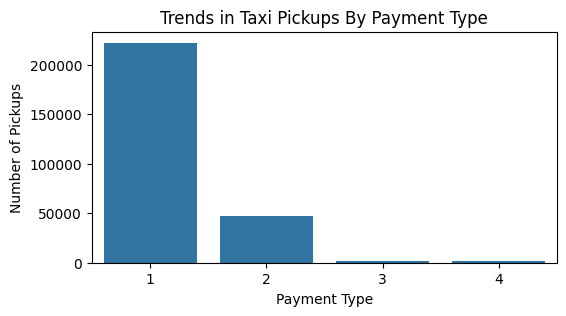

In [778]:
# Find and show the trend by payment type in taxi pickups


plt.figure(figsize=(6, 3))
sns.countplot(x=df['payment_type'])
plt.title('Trends in Taxi Pickups By Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Pickups')
plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [67]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [779]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Shikha_Documents\PG\Python Code\Class\SQL & Statistics Essential\NYC Case Study\Requirement\Datasets and Dictionary\taxi_zones\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

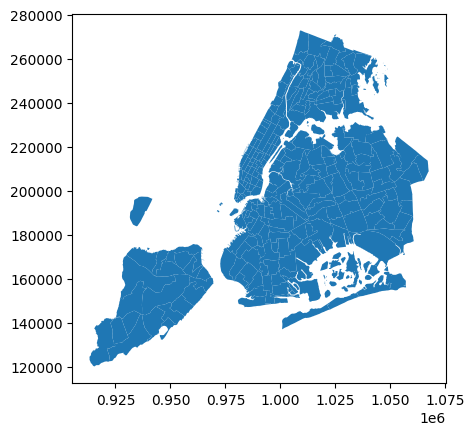

In [780]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [781]:
# Merge zones and trip records using locationID and PULocationID

filtered_df = pd.merge(filtered_df, zones , how = 'left', left_on = 'PULocationID', right_on = 'LocationID' ,suffixes =('' ,'_pickup'))

In [786]:
filtered_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4           7.10         1.0                  N           246            37   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         32.4    6.0      0.5        0.00           0.0   
1             1          7.9    1.0      0.5        2.58           0.0   
2             2         11.4    1.0      0.5        0.00           0.0   
3             2          6.5    1.0      0.5        0.00           0.0   
4             1         34.5    3.5      0.5        7.90           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         47.40                   2.5         0.00   

  pickup_date  pickup_hour day_name  pickup_month    month  quarter  \
0  2023-01-01            0   Sunday             1  2023-01        1   
1  2023-01-01            0   Sunday             1  2023-01        1   
2  2023-01-01            0   Sunday             1  2023-01        1   
3  2023-01-01            0   Sunday             1  2023-01        1   
4  2023-01-01            0   Sunday             1  2023-01        1   

   trip_duration  OBJECTID  Shape_Leng  Shape_Area                       zone  \
0      15.950000     138.0    0.107467    0.000537          LaGuardia Airport   
1       5.083333     161.0    0.035804    0.000072             Midtown Center   
2      10.550000     237.0    0.042213    0.000096      Upper East Side South   
3       5.416667     143.0    0.054180    0.000151        Lincoln Square West   
4      33.616667     246.0    0.069467    0.000281  West Chelsea/Hudson Yards   

   LocationID    borough                                           geometry  
0       138.0     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
1       161.0  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...  
2       237.0  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...  
3       143.0  Manhattan  POLYGON ((989338.1 223572.253, 989368.225 2235...  
4       246.0  Manhattan  POLYGON ((983031.177 217138.506, 983640.32 216...

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [782]:
# Group data by location and calculate the number of trips

trip_count = filtered_df.groupby('LocationID').size().reset_index(name ='num_trip')
print(trip_count)

     LocationID  num_trip
0           1.0        39
1           3.0         1
2           4.0       265
3           6.0         3
4           7.0       116
..          ...       ...
211       259.0         1
212       260.0        46
213       261.0      1442
214       262.0      3487
215       263.0      5239

[216 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [784]:
# Merge trip counts back to the zones GeoDataFrame

zones = pd.merge(zones, trip_count, how = 'left', left_on = 'LocationID', right_on = "LocationID",suffixes =('' ,'_trip'))


In [785]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  num_trip  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...      39.0  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...       NaN  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...       1.0  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...     265.0  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...       NaN

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

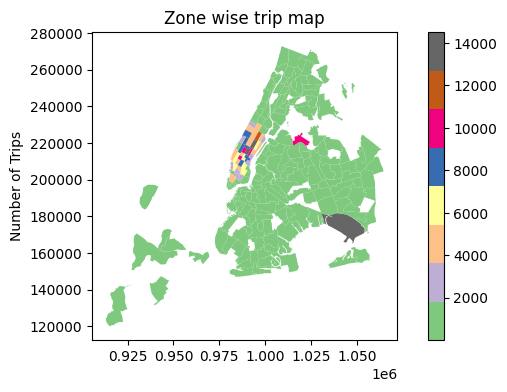

In [787]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (8, 4))

# Plot the map and display it

zones.plot(column = 'num_trip', ax = ax, legend = True, cmap = 'Accent')
plt.title('Zone wise trip map')
plt.ylabel('Number of Trips')
plt.show()

In [323]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by = 'num_trip', ascending = False)

print(zones_sorted)



     OBJECTID  Shape_Leng  Shape_Area                      zone  LocationID  \
236       237    0.042213    0.000096     Upper East Side South         237   
160       161    0.035804    0.000072            Midtown Center         161   
235       236    0.044252    0.000103     Upper East Side North         236   
161       162    0.035270    0.000048              Midtown East         162   
141       142    0.038176    0.000076       Lincoln Square East         142   
..        ...         ...         ...                       ...         ...   
250       251    0.137711    0.000626               Westerleigh         251   
251       252    0.158004    0.001025                Whitestone         252   
253       254    0.085886    0.000360  Williamsbridge/Olinville         254   
256       257    0.058669    0.000139           Windsor Terrace         257   
258       259    0.126750    0.000395        Woodlawn/Wakefield         259   

           borough                                 

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


Analysis:

Busiest hours, days and months:

•	Distribution of taxi pickups by hour shows that taxi demand gradually starts increasing at 7 AM with clear evening rush between 5 PM to 7 PM, coinciding with office schedules. Decrease in demand between 12 AM to 5 AM is expected due to low commuting at night. 

•	Distribution of taxi pickups by day of the week shows that mid-week (Tuesday to Thursday) and weekend ( Friday and Saturday) see an increased taxi demand due to office related and social activities. Demand is lower on Monday and Sunday due to relaxed days and preference to other mode of transport. Analyzing this trend helps us understand peak demand days and planning for taxi availability or adjusting operations accordingly.

•	Distribution of taxi pickups by month shows that March to June and then October to December show an increased taxi demand, likely due to holidays, outdoor activities and tourism. Demand is lower during winter months (in January and February) and summer months (July to September) due to extreme climate and people preferring to stay indoors or opting for personal commute. Analyzing this trend helps us understand peak demand months and planning for taxi availability and pricing strategy accordingly.

Trends in revenue collected:

•	Monthly revenue trend has a direct correlation with monthly pickup trend. Again, monthly revenue trend remains strong throughout the year with surge in March – June and October – December. These periods encourage higher demand due to holidays leading to outdoor activities and tourism. On the other hand, January- February and July-September  see a drop in revenue due to extreme climate and people prefer to stay indoors or opting for personal commute. Analyzing this trend helps business allocate resources and pricing strategy accordingly. 

Trends in quarterly revenue

•	The quarterly revenue trend is like the monthly revenue trend reflecting higher revenue collected during the second and fourth quarters as these periods encourage higher demand due to holidays leading to outdoor activities and tourism. The revenue generated during the first and third quarters is lower due to extreme climate and people prefer to stay indoors or opting for personal commute.

Relation between fare and trip distance, trip duration and passenger counts

•	The scatterplot between trip duration and fare amount demonstrates a weak positive correlation of 0.265 indicating that duration slightly impact fare amount and there are other factors which play significant role.

•	The scatterplot between fare amount and passenger count demonstrates a very weak positive correlation of 0.0465 indicating that passenger count does not impact fare amount.

•	The scatterplot between tip amount and trip duration demonstrates a positive correlation of 0.794 indicating that longer trips generally tend to higher tip amount. However, this relation is not significant and there could be other factors impacting tip amount. 

Relation between tip amount and trip distance

•	The scatterplot between trip distance and fare amount demonstrates a strong positive correlation of 0.944 indicating that with increase in distance, fare amount also increases. Analyzing this trend provides valuable insights into pricing models. Presence of other factors like traffic condition and time of the day may cause fluctuations though these don’t impact the overall trend significantly.

Busiest zones

•	Busiest zones are Upper East Side South and North, Midtown Center,  Penn Station/Madison Sq West showing the major cities and transportation hubs are areas of high traffic density.


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# create a backup of dataframes

filtered_df_bkp = filtered_df.copy()
zones_bkp = zones.copy()


In [790]:
# Find routes which have the slowest speeds at different times of the day

# Filter out rows where trip_duration = 0 or trip distance  = 0
trip_filtered_df = filtered_df[(filtered_df['trip_duration'] > 0) & (filtered_df['trip_distance'] >0)]

# Speed for each route (miles / hr)
trip_filtered_df['speed'] = trip_filtered_df['trip_distance']/trip_filtered_df['trip_duration'] *60

#Group by hour and find slowest route
hourly_slowest_route = trip_filtered_df.groupby('pickup_hour').apply(lambda x: x.loc[x['speed'].idxmin()])

slow_route_summary = hourly_slowest_route[['pickup_hour',  'zone', 'speed']]

print(slow_route_summary)
 


             pickup_hour                           zone     speed
pickup_hour                                                      
0                      0                       Gramercy  0.019603
1                      1                   West Village  0.099891
2                      2  Sutton Place/Turtle Bay North  0.081157
3                      3                Lower East Side  0.031562
4                      4                            NaN  0.027607
5                      5      Times Sq/Theatre District  0.365070
6                      6        Greenwich Village North  1.167883
7                      7                    Murray Hill  0.057361
8                      8                   Midtown East  0.029811
9                      9          Upper East Side South  0.023398
10                    10                       Flatiron  0.028046
11                    11               Garment District  0.031755
12                    12                       Union Sq  0.033872
13        

How does identifying high-traffic, high-demand routes help us?

By identifying high -traffic and high-demand routes:
1. Companies can deploy more vehicles on these routes.
2. Increased in revenue generation as vehicles are optimally uitlized.
3. Knowledge of peak timings, help to meet the demand and minimize the delays.
4. Better route management and planning. Government can use this data to analyze the requirement  of flyover, making roads one way during peak hours, widening of roads.

All of this will result in better customer satisfaction and planning

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

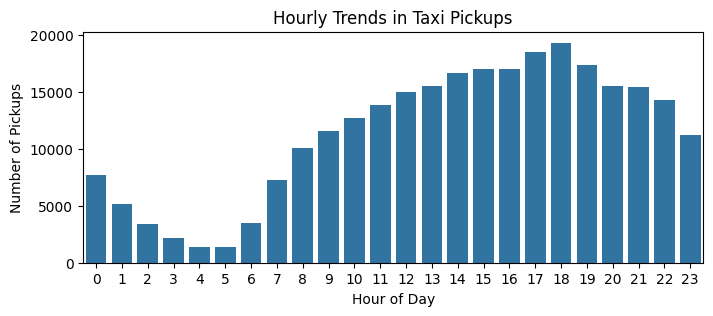

In [794]:
# Visualise the number of trips per hour and find the busiest hour

plt.figure(figsize=(8, 3))
sns.countplot(x=filtered_df['pickup_hour'])
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()


In [795]:
#Find the busiest hour

busiest_hour = hourly_trend.idxmax()
print ("Busiest Hour is : " , busiest_hour )


Busiest Hour is :  18


In [797]:
busiest_hour_count = hourly_trend.max()
print("Count of trips during busiest hour is : " , busiest_hour_count)



Count of trips during busiest hour is :  18268


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [799]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.0075

print("Sample Fraction size is :", sample_fraction)

top_5_busiest_hours = hourly_trend.sort_values(ascending = False).head(5)
print("Top 5 Busiest hour by trip count  : ",  top_5_busiest_hours)


Sample Fraction size is : 0.0075
Top 5 Busiest hour by trip count  :  pickup_hour
18    18268
17    17306
19    16247
16    15855
15    15796
dtype: int64


In [800]:
# Actual Number of trips in 5 busiest hours 
Actual_num_of_trips = top_5_busiest_hours / sample_fraction

print("Actual number of trips is :", round(Actual_num_of_trips))

Actual number of trips is : pickup_hour
18    2435733.0
17    2307467.0
19    2166267.0
16    2114000.0
15    2106133.0
dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [801]:
# Calculate Day of the week (number) and weekday type (Weekday / Weeekend) to help populate the graph
filtered_df['day_of_week'] = filtered_df['tpep_pickup_datetime'].dt.weekday
filtered_df['weekday_type'] = filtered_df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

hourly_trend_daytype = filtered_df.groupby(['weekday_type', 'pickup_hour']).size().reset_index(name ='num_trip')


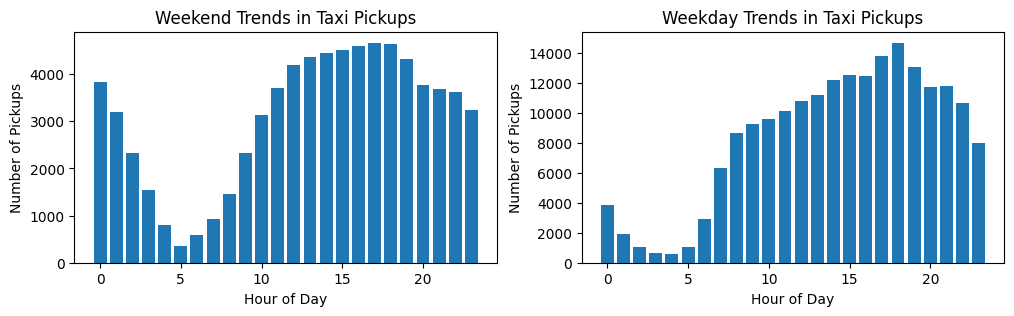

In [803]:
# Compare traffic trends for the week days and weekends

fig, (ax1, ax2) = plt.subplots (1,2 , figsize = (12,3))

weekend_hourly_trend = hourly_trend_daytype[hourly_trend_daytype['weekday_type'] =='Weekend']
ax1.bar(weekend_hourly_trend['pickup_hour'], weekend_hourly_trend['num_trip'])
ax1.set_title('Weekend Trends in Taxi Pickups')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Pickups')

weekday_hourly_trend = hourly_trend_daytype[hourly_trend_daytype['weekday_type'] =='Weekday']
ax2.bar(weekday_hourly_trend['pickup_hour'], weekday_hourly_trend['num_trip'])
ax2.set_title('Weekday Trends in Taxi Pickups')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Number of Pickups')

plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Answer: From the above graphs it is observed that,
1. Number of trip count is more during most of the hours over the weekend as compared to weekdays
2. Weekday number of trips is higher around 5 PM to 7 PM which correlated to office hours whereas durng weekend number of trips increase around 12 noon and is there till 1 AM indicating people are out of lucnch , dinner and other entertainment.


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [804]:
filtered_df_bkp = filtered_df.copy()
zones_bkp = zones.copy()


In [373]:
filtered_df = filtered_df_bkp.copy()
zones = zones_bkp.copy()


In [805]:
# Find top 10 pickup and dropoff zones

# Group the data for a zone and hour
hourly_trend_pickup_zone = filtered_df.groupby(['zone', 'pickup_hour']).size().reset_index(name ='num_pickup_trip')

#Identify top 10 pickup zones by number of trips
top_10_pickup_zone = hourly_trend_pickup_zone.groupby(['zone'])['num_pickup_trip'].sum().nlargest(10).index

print(f'Top 10 Pickup Zones are : ', top_10_pickup_zone)

# Calculate Drop Hour 
filtered_df['drop_hour'] = filtered_df['tpep_pickup_datetime'].dt.hour

# Merge zones and trip records using locationID and DOLocationID

filtered_df = pd.merge(filtered_df, zones , how = 'inner', left_on = 'DOLocationID', right_on = 'LocationID' , suffixes = ('' , '_drop'))

# Group the data for a zone and hour
hourly_trend_drop_zone = filtered_df.groupby(['zone_drop', 'drop_hour']).size().reset_index(name ='num_drop_trip')

#Identify top 10 drop off zones
top_10_drop_zone = hourly_trend_drop_zone.groupby(['zone_drop'])['num_drop_trip'].sum().nlargest(10).index

print(f'Top 10 Drop Zones are : ', top_10_drop_zone)


Top 10 Pickup Zones are :  Index(['JFK Airport', 'Upper East Side South', 'Midtown Center',
       'Upper East Side North', 'Midtown East', 'LaGuardia Airport',
       'Penn Station/Madison Sq West', 'Times Sq/Theatre District',
       'Lincoln Square East', 'Murray Hill'],
      dtype='object', name='zone')
Top 10 Drop Zones are :  Index(['Upper East Side North', 'Upper East Side South', 'Midtown Center',
       'Times Sq/Theatre District', 'Murray Hill', 'Midtown East',
       'Lincoln Square East', 'Upper West Side South', 'Lenox Hill West',
       'East Chelsea'],
      dtype='object', name='zone_drop')


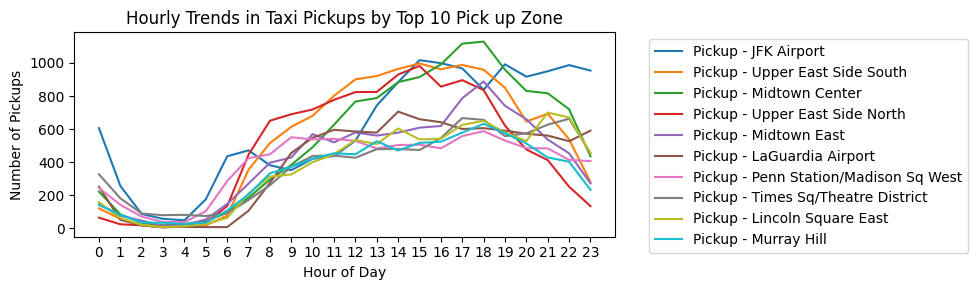

In [ ]:
# Create dataframe with data for above 10 zones
top_10_pickup_zone_df = hourly_trend_pickup_zone[hourly_trend_pickup_zone['zone'].isin(top_10_pickup_zone)]

#Plot graph for pickup Zones 
plt.figure(figsize = (10,3))

for zone in top_10_pickup_zone:
    pickup_zone_data = top_10_pickup_zone_df[top_10_pickup_zone_df['zone'] == zone]
    plt.plot(pickup_zone_data['pickup_hour'], pickup_zone_data['num_pickup_trip'], label = f'Pickup - {zone}') 

plt.title('Hourly Trends in Taxi Pickups by Top 10 Pick up Zone')
plt.xlabel('Hour of Day')
plt.xticks(range(0, 24))
plt.ylabel('Number of Pickups')
plt.legend(loc = 'upper left',bbox_to_anchor = (1.05,1))
plt.tight_layout()

plt.show()

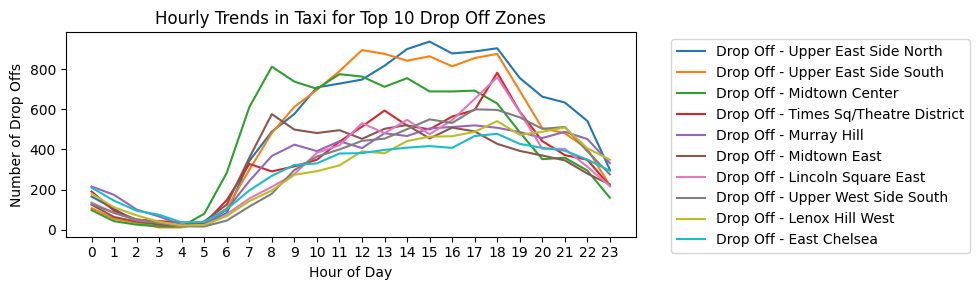

In [808]:
# Create dataframe with data for above 10 zones
top_10_drop_zone_df = hourly_trend_drop_zone[hourly_trend_drop_zone['zone_drop'].isin(top_10_drop_zone)]


#Plot graph for dropoff Zones 
plt.figure(figsize = (10,3))

for zone in top_10_drop_zone:
    drop_zone_data = top_10_drop_zone_df[top_10_drop_zone_df['zone_drop'] == zone]
    plt.plot(drop_zone_data['drop_hour'], drop_zone_data['num_drop_trip'], label = f'Drop Off - {zone}') 

plt.title('Hourly Trends in Taxi for Top 10 Drop Off Zones')
plt.xlabel('Hour of Day')
plt.xticks(range(0, 24))
plt.ylabel('Number of Drop Offs')
plt.legend(loc = 'upper left',bbox_to_anchor = (1.05,1))
plt.tight_layout()


plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

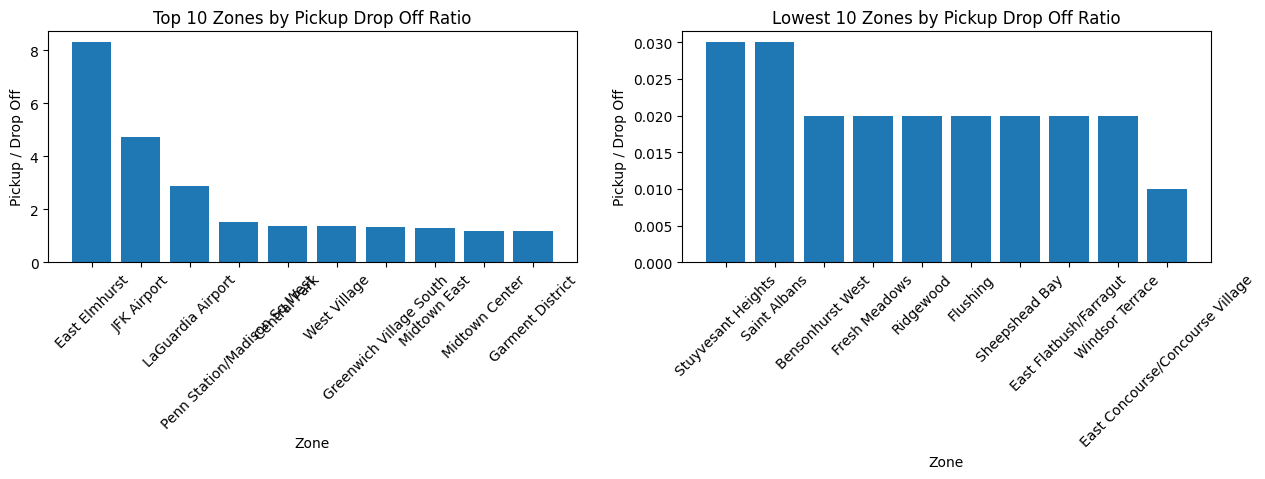

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

#Group pickup zones by number of trips
pickup_zone = hourly_trend_pickup_zone.groupby(['zone'])['num_pickup_trip'].sum().reset_index()

#Group drop off zones by number of trips
drop_zone = hourly_trend_drop_zone.groupby(['zone_drop'])['num_drop_trip'].sum().reset_index()

# Merge Pickup Zone and Drop Zone into single dataframe
zone_trip_df = pd.merge(pickup_zone, drop_zone, how = 'left' , left_on = 'zone', right_on = 'zone_drop' ) 

#Identify pickup/dropoff ratios
zone_trip_df['pickup_dropoff_ratio'] = zone_trip_df['num_pickup_trip']/ zone_trip_df['num_drop_trip']

# Remove NaN values for Pickup Drop Off ratio
zone_trip_df = zone_trip_df.dropna(subset = ['pickup_dropoff_ratio'])

# Sort Dataframe
zone_trip_sorted = zone_trip_df.sort_values(by ='pickup_dropoff_ratio',  ascending = False)

# Format Data Set
zone_trip_sorted = zone_trip_sorted.round({'pickup_dropoff_ratio':2})

#Identify top 10 and lowest 10 pickup/dropoff ratios
top_10_pickup_drop_ratio = zone_trip_sorted.head(10)
lowest_10_pickup_drop_ratio = zone_trip_sorted.tail(10)

# Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

fig, (ax1, ax2) = plt.subplots (1,2 , figsize = (15,3))

ax1.bar(top_10_pickup_drop_ratio['zone'], top_10_pickup_drop_ratio['pickup_dropoff_ratio'])
ax1.set_title('Top 10 Zones by Pickup Drop Off Ratio')
ax1.set_xlabel('Zone')
ax1.set_ylabel('Pickup / Drop Off')
ax1.tick_params(axis = 'x', rotation = 45)

ax2.bar(lowest_10_pickup_drop_ratio['zone_drop'], lowest_10_pickup_drop_ratio['pickup_dropoff_ratio'])
ax2.set_title('Lowest 10 Zones by Pickup Drop Off Ratio')
ax2.set_xlabel('Zone')
ax2.set_ylabel('Pickup / Drop Off')
ax2.tick_params(axis = 'x', rotation = 45)

plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [812]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_df = filtered_df[(filtered_df['pickup_hour'] >= 23 ) | (filtered_df['pickup_hour']<=5 ) | (filtered_df['drop_hour'] >= 23) | (filtered_df['drop_hour'] <= 5)]

#Identify top 10 pickup zones during night by number of trips
top_10_night_pickup_zone = night_df['zone'].value_counts().head(10)

print(f"Top 10 Pickup zones during Night are : ", top_10_night_pickup_zone)

#Identify top 10 drop zones during night by number of trips
top_10_night_drop_zone = night_df['zone_drop'].value_counts().head(10)

print(f"Top 10 Drop Off zones during Night are : ",top_10_night_drop_zone)


Top 10 Pickup zones during Night are :  zone
East Village                    2338
JFK Airport                     2090
West Village                    1895
Clinton East                    1524
Lower East Side                 1462
Times Sq/Theatre District       1284
Greenwich Village South         1281
Penn Station/Madison Sq West    1036
LaGuardia Airport                921
Midtown South                    897
Name: count, dtype: int64
Top 10 Drop Off zones during Night are :  zone_drop
East Village             1270
Clinton East             1049
Murray Hill               939
East Chelsea              895
Gramercy                  882
Lenox Hill West           799
Yorkville West            772
West Village              708
Upper East Side North     689
Flatiron                  680
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [813]:
# Filter for night hours (11 PM to 5 AM)

night_df = filtered_df[(filtered_df['pickup_hour'] >= 23 ) | (filtered_df['pickup_hour']<=5 ) | (filtered_df['drop_hour'] >= 23) | (filtered_df['drop_hour'] <= 5)]

# Calculate revenue generated during night
night_revenue = night_df['total_amount'].sum()

print(f"Revenue Generated During night : {night_revenue:.2f}")

# Filter for day hours (5 AM to 11 PM)
day_df = filtered_df[((filtered_df['pickup_hour'] <= 22 ) & (filtered_df['pickup_hour'] >= 6 ) )& ((filtered_df['drop_hour'] <= 22) &(filtered_df['drop_hour'] >= 6))]

# Calculate revenue generated during day
day_revenue = day_df['total_amount'].sum()

print(f"Revenue Generated During day : {day_revenue:.2f} ")

Total_revenue = filtered_df['total_amount'].sum()

# Calculate Revenue Share
Night_Revenue_Share = night_revenue / (night_revenue + day_revenue) * 100
Day_Revenue_Share = day_revenue / (night_revenue + day_revenue) * 100

print(f"Nighttime Revenue Share :  {Night_Revenue_Share:.2f}% ")
print(f"Daytime Revenue Share : {Day_Revenue_Share:.2f}%")

Revenue Generated During night : 921096.09
Revenue Generated During day : 6728295.94 
Nighttime Revenue Share :  12.04% 
Daytime Revenue Share : 87.96%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

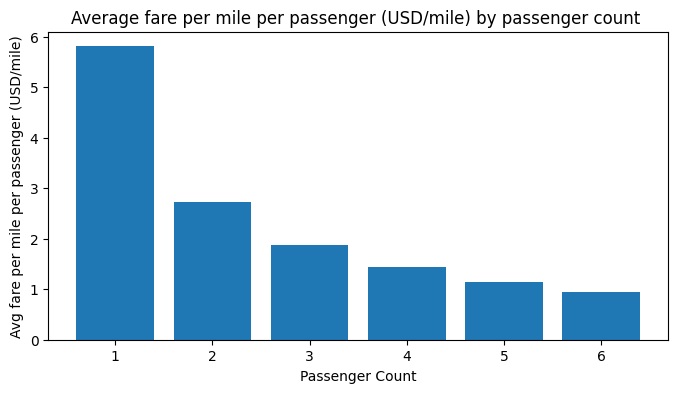

                 avg_fare_per_mile_passenger
passenger_count                             
1                                       5.81
2                                       2.72
3                                       1.88
4                                       1.45
5                                       1.14
6                                       0.94


In [816]:
# Analyse the fare per mile per passenger for different passenger counts

# Calculate Total Fare amount and Trip Distance for each passenger count
passenger_count_df = filtered_df.groupby('passenger_count').agg({'fare_amount': 'sum', 'trip_distance': 'sum'} ).reset_index()

# Calculate Average Fare per mile per passenger count 
passenger_count_df['avg_fare_per_mile_passenger'] = passenger_count_df['fare_amount'] / passenger_count_df['trip_distance'] / passenger_count_df['passenger_count']

# Format Data Set and pivot
passenger_count_df['passenger_count'] = passenger_count_df['passenger_count'].astype(int)
passenger_count_df = passenger_count_df.round({'fare_amount':2, 'trip_distance':2,'avg_fare_per_mile_passenger':2})

plt.figure(figsize=(8, 4))
plt.bar(passenger_count_df['passenger_count'], passenger_count_df['avg_fare_per_mile_passenger'])
plt.title('Average fare per mile per passenger (USD/mile) by passenger count ')
plt.xlabel('Passenger Count')
plt.ylabel('Avg fare per mile per passenger (USD/mile)')
plt.show()

passenger_count_pivot = passenger_count_df.pivot_table(index = 'passenger_count' , values = ['avg_fare_per_mile_passenger'] )
print(passenger_count_pivot)



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

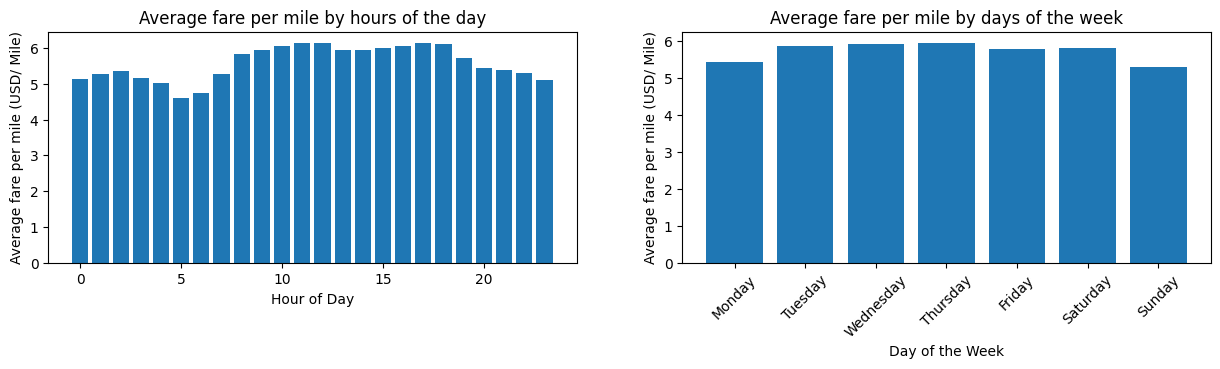

In [817]:
# Compare the average fare per mile for different days and for different times of the day

# Calculate Total Fare amount and Trip Distance by pick hour and days of week
hour_count_df = filtered_df.groupby('pickup_hour').agg({'fare_amount': 'sum', 'trip_distance': 'sum'} ).reset_index()
day_name_count_df = filtered_df.groupby('day_name').agg({'fare_amount': 'sum', 'trip_distance': 'sum'} ).reset_index()

# Calculate Average Fare per mile by pick hour and days of week
hour_count_df['avg_fare_per_mile'] = hour_count_df['fare_amount'] / hour_count_df['trip_distance'] 
day_name_count_df['avg_fare_per_mile'] = day_name_count_df['fare_amount'] / day_name_count_df['trip_distance'] 

# Format Data Set and pivot
#passenger_count_df['passenger_count'] = passenger_count_df['passenger_count'].astype(int)
hour_count_df = hour_count_df.round({'fare_amount':2, 'trip_distance':2,'avg_fare_per_mile':2})
day_name_count_df = day_name_count_df.round({'fare_amount':2, 'trip_distance':2,'avg_fare_per_mile':2})


# Sort Days of week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_name_count_df['day_name'] = pd.Categorical(day_name_count_df['day_name'], categories= ordered_days, ordered = True)
day_name_count_df = day_name_count_df.sort_values('day_name')

# Compare the average fare per mile for different days and for different times of the day

fig, (ax1, ax2) = plt.subplots (1,2 , figsize = (15,3))

ax1.bar(hour_count_df['pickup_hour'], hour_count_df['avg_fare_per_mile'])
ax1.set_title('Average fare per mile by hours of the day')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average fare per mile (USD/ Mile)')

ax2.bar(day_name_count_df['day_name'], day_name_count_df['avg_fare_per_mile'])
ax2.set_title('Average fare per mile by days of the week')
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Average fare per mile (USD/ Mile)')
ax2.tick_params(axis = 'x', rotation = 45)

plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

<Figure size 800x300 with 0 Axes>

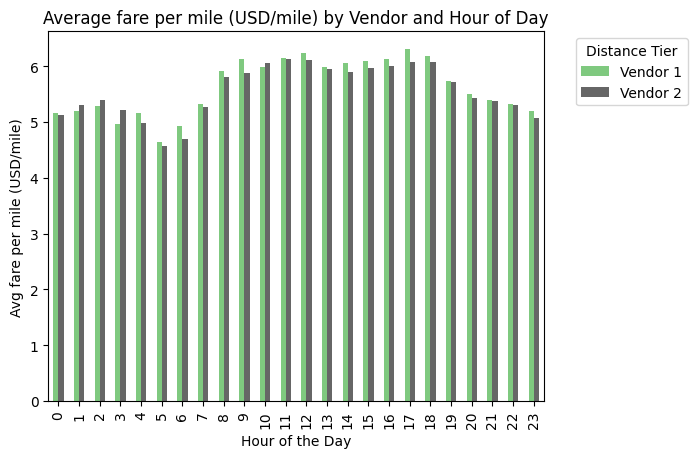

In [818]:
# Compare fare per mile for different vendors

# Calculate Total Fare amount and Trip Distance for the different vendors for different hours of the day
vendor_hour_df = filtered_df.groupby(['VendorID', 'pickup_hour']).agg({'fare_amount': 'sum', 'trip_distance': 'sum'} ).reset_index()

# Calculate Average Fare per mile for the different vendors for different hours of the day
vendor_hour_df['avg_fare_per_mile'] = vendor_hour_df['fare_amount'] / vendor_hour_df['trip_distance'] 

# Create Pivot
vendor_hour_pivot = vendor_hour_df.pivot_table(index = 'pickup_hour' , columns = 'VendorID' , values = ['avg_fare_per_mile'] )


#Plot graph for vendor 
plt.figure(figsize=(8, 3))
vendor_hour_pivot.plot(kind = 'bar', cmap = 'Accent')
plt.title('Average fare per mile (USD/mile) by Vendor and Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Avg fare per mile (USD/mile)')
plt.legend(title = 'Distance Tier', labels = ['Vendor 1', 'Vendor 2'], loc = 'upper left',bbox_to_anchor = (1.05,1))
plt.show()




**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


<Figure size 600x300 with 0 Axes>

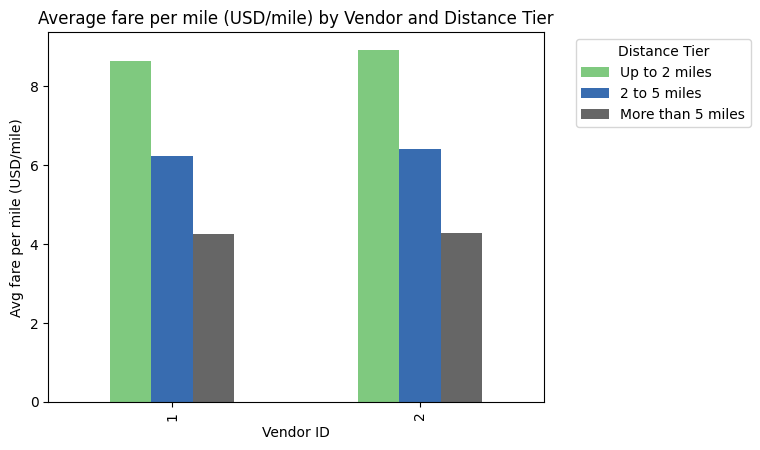

In [820]:
# Defining distance tiers

tier_labels = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']

# Calculate Tier Type 

distance_tier = filtered_df.copy()
distance_tier['tier_type'] = pd.cut(distance_tier['trip_distance'], bins = [0,2,5,float('inf')], labels = tier_labels)

# Calculate Total Fare amount and Trip Distance for the different vendors for different distance tiers
vendor_tier_df = distance_tier.groupby(['VendorID', 'tier_type']).agg({'fare_amount': 'sum', 'trip_distance': 'sum'} ).reset_index()

# Calculate Average Fare per mile for the different vendors for different hours of the day
vendor_tier_df['avg_fare_per_mile'] = vendor_tier_df['fare_amount'] / vendor_tier_df['trip_distance'] 

# Format Data Set and pivot
vendor_tier_df = vendor_tier_df.round({'fare_amount':2, 'trip_distance':2,'avg_fare_per_mile':2})

# Create Pivot
vendor_tier_pivot = vendor_tier_df.pivot_table(index = 'VendorID' , columns = 'tier_type' , values = ['avg_fare_per_mile'] )

plt.figure(figsize=(6, 3))
vendor_tier_pivot.plot(kind = 'bar', cmap = 'Accent')
plt.title('Average fare per mile (USD/mile) by Vendor and Distance Tier')
plt.xlabel('Vendor ID')
plt.ylabel('Avg fare per mile (USD/mile)')
plt.legend(title = 'Distance Tier', labels = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'], loc = 'upper left',bbox_to_anchor = (1.05,1))
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
    Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



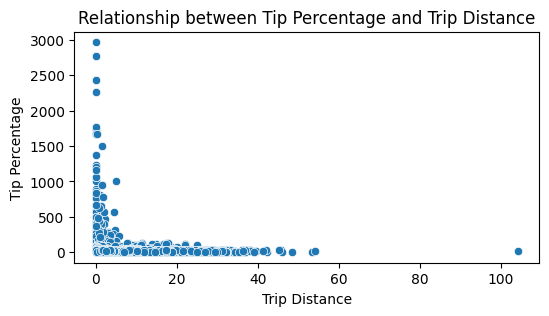

In [ ]:
#  Analyze tip percentages based on  trip distances
tip_analysis_df = filtered_df.copy()
 
# Calculate tip Percent 
tip_analysis_df['tip_percent'] =tip_analysis_df['tip_amount'] /tip_analysis_df['fare_amount']*100

# Plot the relationship between tip amount and trip distance
plt.figure(figsize=(6, 3))
sns.scatterplot(x=tip_analysis_df['trip_distance'], y=tip_analysis_df['tip_percent'])
plt.title('Relationship between Tip Percentage and Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')
plt.show()


In [826]:
# Calculate the correlation between trip_distance and tip percent
correlation = tip_analysis_df['trip_distance'].corr(tip_analysis_df['tip_percent'])

print(f'Correlation between trip_distance and tip percent: {correlation}')

Correlation between trip_distance and tip percent: -0.09061904447997896


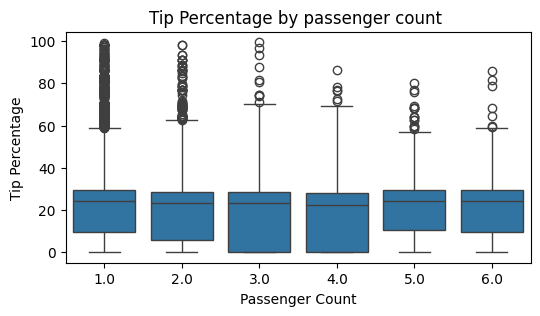

In [ ]:
#  Analyze tip percentages based on passenger counts

# Filter Tip Percentage greater than 100%
passenger_count_df = tip_analysis_df[tip_analysis_df['tip_percent'] < 100]

plt.figure(figsize=(6, 3))
sns.boxplot(x=passenger_count_df['passenger_count'],y=passenger_count_df['tip_percent'])
plt.title('Tip Percentage by passenger count ')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.show()


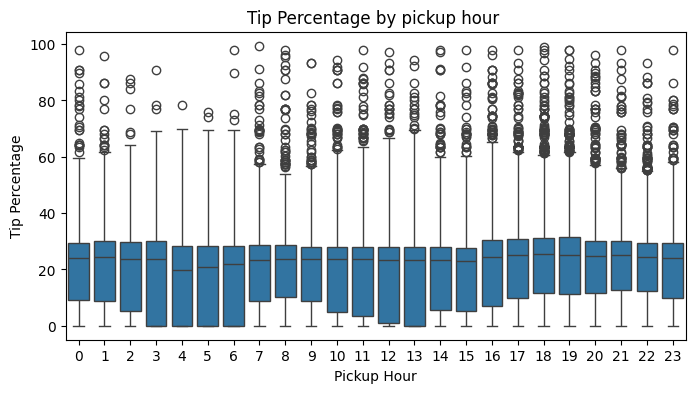

In [824]:
#  Analyze tip percentages based on pickup times

plt.figure(figsize=(8, 4))
sns.boxplot(x=passenger_count_df['pickup_hour'],y=passenger_count_df['tip_percent'])
plt.title('Tip Percentage by pickup hour ')
plt.xlabel('Pickup Hour')
plt.ylabel('Tip Percentage')
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

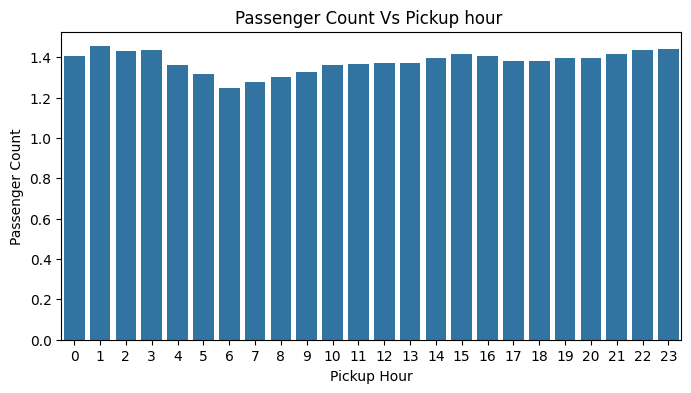

In [828]:
# See how passenger count varies across hours and days

#  Analyze passenger count varies across hours

plt.figure(figsize=(8, 4))
sns.barplot(x=filtered_df['pickup_hour'],y=filtered_df['passenger_count'],errorbar=None)
plt.title('Passenger Count Vs Pickup hour ')
plt.xlabel('Pickup Hour')
plt.ylabel('Passenger Count')
plt.show()



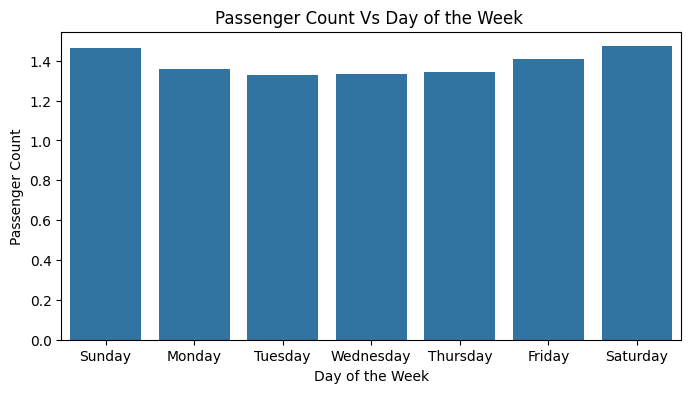

In [829]:
#  Analyze passenger count varies across days of week

plt.figure(figsize=(8, 4))
sns.barplot(x=filtered_df['day_name'],y=filtered_df['passenger_count'],errorbar=None)
plt.title('Passenger Count Vs Day of the Week ')
plt.xlabel('Day of the Week')
plt.ylabel('Passenger Count')
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

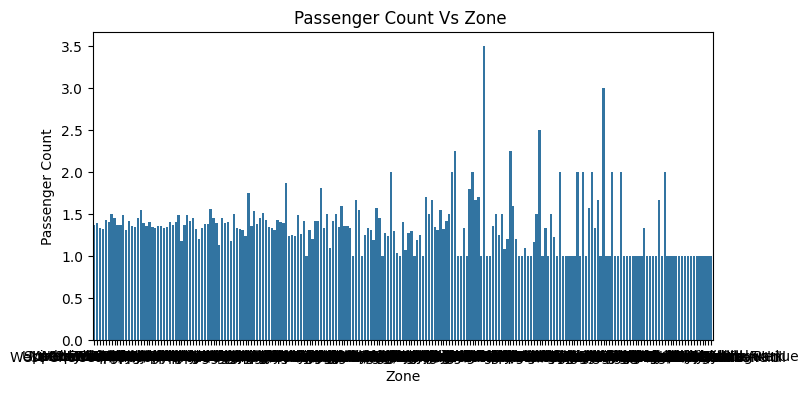

In [831]:
# How does passenger count vary across zones

#  Analyze passenger count varies zones

plt.figure(figsize=(8, 4))
sns.barplot(x=filtered_df['zone'],y=filtered_df['passenger_count'],errorbar=None)
plt.title('Passenger Count Vs Zone ')
plt.xlabel('Zone')
plt.ylabel('Passenger Count')
plt.show()

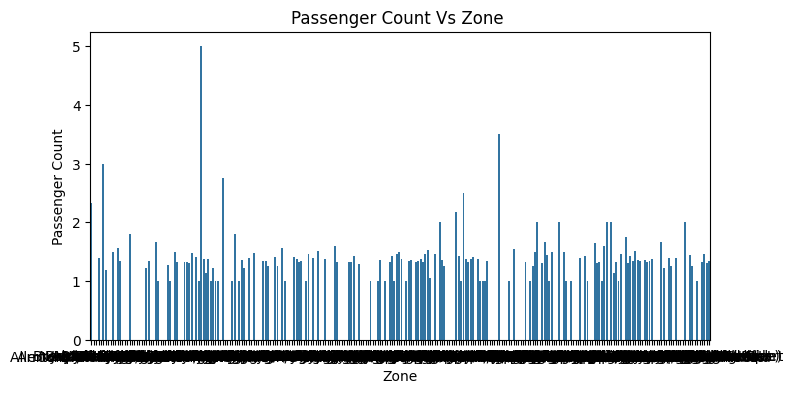

In [597]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Group by Location ID to find average passenger count
avg_passenger = filtered_df.groupby('LocationID')['passenger_count'].mean().reset_index()

# Merge averager passenger count back to the zones GeoDataFrame
zones1 = pd.merge(zones, avg_passenger, how = 'left', left_on = 'LocationID', right_on = "LocationID",suffixes =('' ,'_psg'))

plt.figure(figsize=(8, 4))
sns.barplot(x=zones1['zone'],y=zones1['passenger_count'],errorbar=None)
plt.title('Passenger Count Vs Zone ')
plt.xlabel('Zone')
plt.ylabel('Passenger Count')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



In [608]:
filtered_df['extra'].unique()

array([ 1.  ,  3.5 ,  0.  ,  2.5 ,  3.75,  1.25,  5.  ,  8.75,  6.  ,
        7.25,  2.25,  0.5 ,  7.5 ,  6.25, 11.25,  6.8 ,  9.75, 10.  ,
        8.5 ,  2.72,  3.2 ,  1.75,  4.25])

In [ ]:
#  Analyze tip percentages based on  trip distances


tip_analysis_df = filtered_df.copy()

# Calculate tip Percent 
tip_analysis_df['tip_percent'] =tip_analysis_df['tip_amount'] /tip_analysis_df['fare_amount']*100

# Plot the relationship between tip amount and trip distance
plt.figure(figsize=(6, 3))
sns.scatterplot(x=tip_analysis_df['trip_distance'], y=tip_analysis_df['tip_percent'])
plt.title('Relationship between Tip Percentage and Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')
plt.show()


In [832]:
# Filter on zones where extra chareg is applied
extra_charge_df = filtered_df[filtered_df['extra'] > 0]

#Group by pick up zone to calculate number of trips where extra charge is applied and total number of trips 
extra_charge_by_zone = extra_charge_df.groupby('zone').size().reset_index(name = 'extra_charge_count')
total_trip_by_zone = filtered_df.groupby('zone').size().reset_index(name = 'total_trip_count')

# Merge the 2 data frames and calculate percentage of trips in a zone based on extra charge applied
zone_charge_percentage = pd.merge(total_trip_by_zone, extra_charge_by_zone, on = 'zone',how = 'left', suffixes = ('', 'extra'))
zone_charge_percentage['charge_percent'] = round(zone_charge_percentage['extra_charge_count'] / zone_charge_percentage['total_trip_count']*100, 2)

zone_charge_percentage.head()




zone  total_trip_count  extra_charge_count  \
0  Allerton/Pelham Gardens                 1                 NaN   
1            Alphabet City               264               217.0   
2  Arrochar/Fort Wadsworth                 3                 2.0   
3                  Astoria               115                51.0   
4             Baisley Park                75                25.0   

   charge_percent  
0             NaN  
1           82.20  
2           66.67  
3           44.35  
4           33.33

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies are :
1.	Optimize fleet availability during peak hour: There are higher number of taxis available during 5 PM to 7 PM and consider the weekend demand into consideration.
2.	Consider less demand durations and lesser taxis can be deployed at that time or maybe tais can work in shifts.
3.	Shared rides can be deployed for off peak time zones. 
4.	Promotional strategies for routes or hour / days with less demand to encourage traffic.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Some of the suggestions on strategically positioning cabs across different zones:
•	Positioning the cabs at high-peak locations to ensure faster availability.
•	Promotional strategies for  low demand zones 


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.